In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scikit_tt.data_driven.regression as rgr
import scikit_tt.data_driven.transform as tdt
import random

### Učitavanje podataka

Učitamo podatke za naš problem

In [34]:
data = np.load('mnist.npz')

image_train = data['x_train']/255
image_test = data['x_test']/255
label_train = data['y_train']
label_test = data['y_test']

# Funkcija koja prima sliku i oznaku, gdje je oznaka string znamenke koju slika prikazuje
def slika(image, lab):
    plt.imshow(image, cmap = plt.cm.gray)
    plt.title("Znamenka: " + str(lab), fontsize = 15)

### Postavljanje parametara

Postavimo parametre (da lakše pratimo i mijenjamo varijable, $m$ je problematičan zbog veličine)

In [35]:
d = 28**2
d_y = 10
m = 2000
alfa = 0.59

### Postavljanje podataka

Definiramo matrice $X$ i $Y$ koje sadrže podatke i labele

In [36]:
X = np.zeros((d, m))

for i in range(m):
    im = image_train[i]
    X[:,i] = im.flatten('F').transpose()
    
# im = np.reshape(X[:,10], (28,28), order = 'F') Za prebacit nazad u sliku.

Y = np.zeros((d_y, m))
for i in range(m):
    vrijednost = label_train[i]
    Y[vrijednost, i] = 1

Definiramo odgovarajuću jezgru u našem problemu

In [37]:
def jezgra(x,y):
    return np.prod(np.cos(alfa*(x-y)))

### Računanje matrice $G$

In [38]:
gram = np.ones((m,m))

for i in range(d):
    theta = np.zeros((2,m))
    redak = alfa*X[i,:]
    theta[0,:] = np.cos(redak)
    theta[1,:] = np.sin(redak)
    
    gram *= (theta.T.dot(theta))

### Računanje $Z$

Rješavamo najmanje kvadrate da bi dobili matricu $Z$

Funkcija $\texttt{np.linalg.lstsq}(A,b)$ rješava sustav $AX = b$ pa za rješenje sustava $ZG = Y$ u varijabli $Z$ transponiramo cijeli sustav i dobijemo $G^TZ^T = Y^T$.

In [39]:
Z, _, _, _ = np.linalg.lstsq(gram, np.transpose(Y))
Z = np.transpose(Z)

<ipython-input-39-294b1156d4b9>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  Z, _, _, _ = np.linalg.lstsq(gram, np.transpose(Y))


### Funkcija za klasifikaciju

In [40]:
def klasifikator2(vektor):
    
    K = np.ones((m,1))
    
    for i in range(d):
        theta = np.zeros((2,m))
        redak = alfa*X[i,:]
        theta[0,:] = np.cos(redak)
        theta[1,:] = np.sin(redak)
        
        K *= (theta.T.dot([[np.cos(alfa*vektor[i])], [np.sin(alfa*vektor[i])]]))
  
    rez = (Z @ K)

    return np.argmax((rez))

In [41]:
duljina = 200

X_test = np.zeros((d,duljina))

for i in range(duljina):
    im = image_test[i]
    X_test[:,i] = im.flatten('F').transpose()

prediction = np.zeros(duljina)
prediction_matrix = np.zeros((10,10))
for i in range(duljina):
    prediction[i] = klasifikator2(X_test[:,i])
    prediction_matrix[int(prediction[i]), label_test[i]] += 1
    
print(np.sum(prediction == label_test[0:duljina])/duljina)

0.875


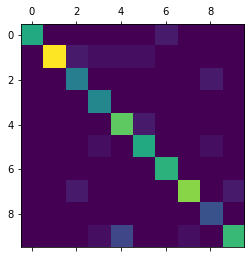

In [42]:
plt.matshow(prediction_matrix)

0
3


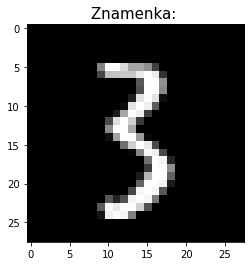

In [28]:
broj = 112
test_slika = image_test[broj]
test_slika = test_slika.flatten('F').transpose()
print(klasifikator2(test_slika))
print(label_test[broj])

slika(image_test[broj], "")

# Funkcije viška

In [45]:
G = np.ones((m,m))

for i in range(m):
    for j in range(i,m): 
        G[i,j] = jezgra(X[:,i], X[:,j])
        G[j,i] = G[i,j]
        #for k in range(d):
        #    G[i,j] *= np.cos(alfa*(X[:,i][k] - X[:,j][k]))

KeyboardInterrupt: 

In [20]:
basis_list = []
for i in range(d):
    basis_list.append([tdt.Cos(i, alfa), tdt.Sin(i, alfa)])

Z = rgr.mandy_kb(X, Y, basis_list)

KeyboardInterrupt: 

In [9]:
def klasifikator(vektor):
    K = np.zeros(m)
    for i in range(m):
        K[i] = jezgra(vektor, X[:,i])
    return np.argmax(Z@K)